In [1]:

import pandas as pd  #Data analasytaion and manipulation
import pandas_datareader as web #read data from internet
import numpy as np #dimensional array
from sklearn.metrics import mean_squared_error ,mean_absolute_error,mean_absolute_percentage_error,r2_score #error_metrcs
from sklearn.preprocessing import MinMaxScaler #normalization and feature scaling
import tensorflow as tf
from math import sqrt #math function
import math
from tensorflow import keras 
from tensorflow.keras import layers
import matplotlib.pyplot as plt #ploting tools
from keras.layers import Dense, Dropout, LSTM, Bidirectional
from keras.layers.recurrent import LSTM, GRU #long short_term memory and gated recurrent unit
import seaborn as sns #ploting  tools
import datetime #datetime

In [2]:
#pip install datareader

In [3]:
#df=web.DataReader('BTC-GBP','yahoo',start=datetime.datetime(2017,12,1),end=datetime.datetime(2022,1,6))
#print(df.head(10))
df=pd.read_csv('BTC-GBP.csv', parse_dates=['Date'],index_col=[0]) #importing dataset
print(df.head(10)) #printing first 10 values

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-01-10  741.589294  753.105835  741.491089  745.710632  745.710632   
2017-01-11  746.068848  756.498291  626.912964  637.192383  637.192383   
2017-01-12  635.079468  679.422729  616.289612  661.598022  661.598022   
2017-01-13  660.696289  680.848389  641.819275  676.728027  676.728027   
2017-01-14  677.679077  685.845093  667.260193  672.151794  672.151794   
2017-01-15  671.930054  676.171997  667.601013  682.726563  682.726563   
2017-01-16  682.714172  693.765076  681.231628  690.700195  690.700195   
2017-01-17  690.211792  734.264160  689.400085  733.094849  733.094849   
2017-01-18  734.253540  742.193054  698.432739  723.297424  723.297424   
2017-01-19  724.698181  733.371704  721.084473  728.879639  728.879639   

               Volume  
Date                   
2017-01-10   95142951  
2017-01-11  254734550  
2017-01-12  182

In [4]:
#df.set_index('Date',inplace=True)

In [5]:
df.tail(10)      #printing last 10 values

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-01,34225.121094,35345.148438,34207.933594,35241.316406,35241.316406,18166984239
2022-01-02,35236.968750,35385.125000,34628.027344,35014.582031,35014.582031,20671834823
2022-01-03,35013.343750,35182.785156,34011.476563,34458.078125,34458.078125,24529292899
2022-01-04,34458.621094,35015.472656,33836.234375,33923.312500,33923.312500,31408198892
2022-01-05,33924.628906,34685.585938,31572.978516,32143.250000,32143.250000,27187072110
2022-01-06,32140.673828,32303.835938,31560.642578,31892.861328,31892.861328,22321602914
2022-01-07,31887.425781,31887.425781,30278.390625,30568.537109,30568.537109,61932077610
2022-01-08,30571.160156,31076.955078,29931.378906,30712.675781,30712.675781,20654480328
2022-01-09,30713.253906,31415.642578,30421.414063,30836.376953,30836.376953,15667300713


C:\Users\gogin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Close', ylabel='Open'>

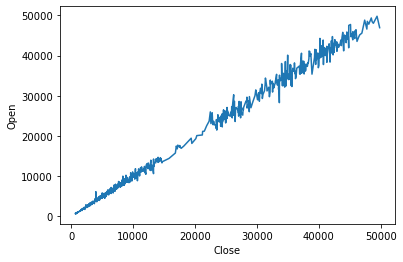

In [6]:
sns.lineplot(df['Close'],df['Open']) #plotting open and close prices of dataset

In [7]:
df.describe()                         #stastical data

,Open,High,Low,Close,Adj Close,Volume
count,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1.827000e+03
mean,11678.497107,11993.454201,11333.470040,11692.802842,11692.802842,1.602389e+10
std,12361.459167,12692.315379,11978.675163,12362.405553,12362.405553,1.559590e+10
min,635.079468,676.171997,616.289612,637.192383,637.192383,4.831801e+07
25%,4362.727295,4458.113769,4210.276611,4380.484375,4380.484375,3.544476e+09
50%,6692.445313,6819.301270,6543.265625,6699.615234,6699.615234,1.298724e+10
75%,10936.779297,11537.092773,10440.842774,11013.806641,11013.806641,2.482657e+10
max,49800.839844,50843.445313,48966.792969,49813.441406,49813.441406,2.519364e+11


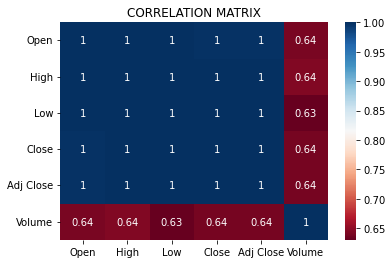

In [8]:
sns.heatmap(df.corr(), annot=True, cmap="RdBu")           #correaltion matrix
plt.title('CORRELATION MATRIX')
plt.show()


<AxesSubplot:>

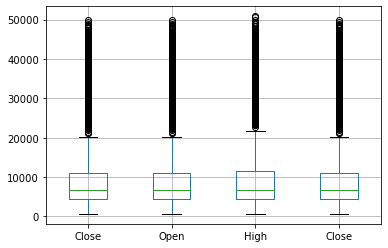

In [9]:
df.boxplot(column=['Close','Open','High','Close']) #boxplots for OPEN ,HIGH,LO,CLOSE

In [10]:
df.info()                                     #dataset information

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1827 entries, 2017-01-10 to 2022-01-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1827 non-null   float64
 1   High       1827 non-null   float64
 2   Low        1827 non-null   float64
 3   Close      1827 non-null   float64
 4   Adj Close  1827 non-null   float64
 5   Volume     1827 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 99.9 KB


In [11]:
df.shape           #shape of data

(1827, 6)

In [12]:

df = df.dropna() #dropping num values (if any)

In [13]:
df.isna().sum()   #checking null vlaues

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<Figure size 1152x576 with 0 Axes>

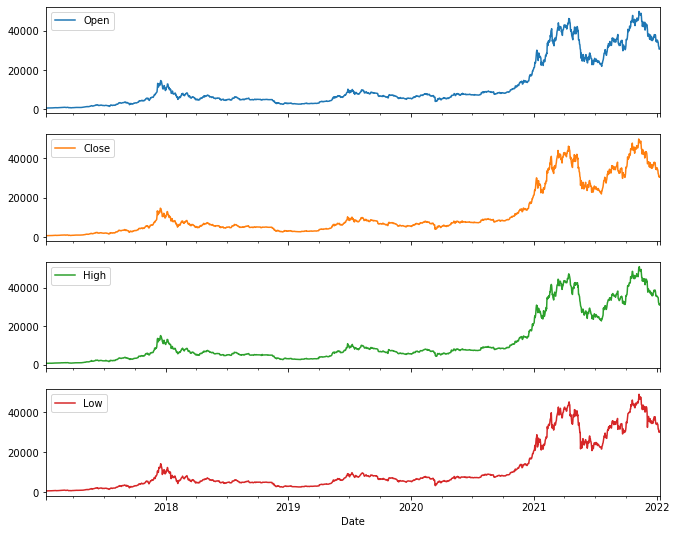

In [14]:
plt.figure(figsize=(16, 8)) #arranging size of the plot
cols = ['Open', 'Close', 'High', 'Low'] 
axes = df[cols].plot(figsize=(11, 9),subplots=True)
plt.show()

<Figure size 1152x576 with 0 Axes>

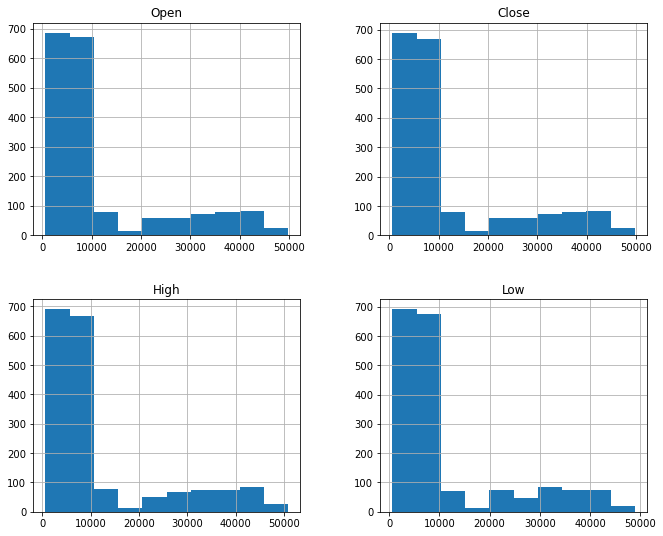

In [15]:
plt.figure(figsize=(16, 8)) #arranging size of the plot
cols = ['Open', 'Close', 'High', 'Low'] 
axes = df[cols].hist(figsize=(11, 9))
plt.show()


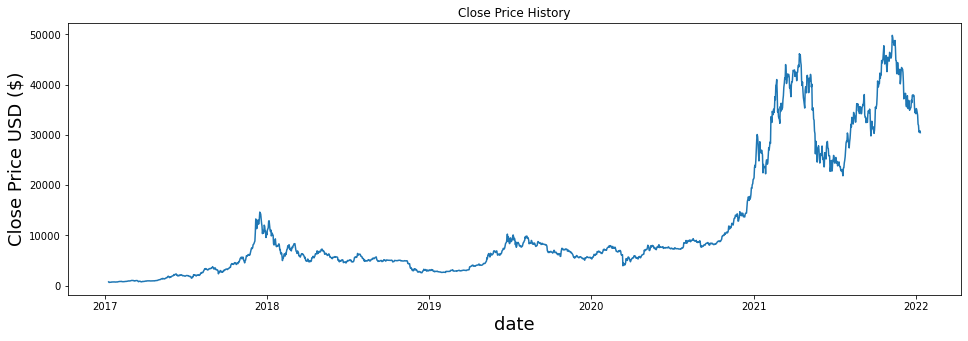

In [16]:
#plotting closing price history
plt.figure(figsize=(16,5))
plt.title("Close Price History")
plt.plot(df['Close'])
plt.xlabel('date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()


In [17]:
data=df.drop(['Volume','Adj Close'],axis=1)
data

,Open,High,Low,Close
Date,,,,
2017-01-10,741.589294,753.105835,741.491089,745.710632
2017-01-11,746.068848,756.498291,626.912964,637.192383
2017-01-12,635.079468,679.422729,616.289612,661.598022
2017-01-13,660.696289,680.848389,641.819275,676.728027
2017-01-14,677.679077,685.845093,667.260193,672.151794
...,...,...,...,...
2022-01-06,32140.673828,32303.835938,31560.642578,31892.861328
2022-01-07,31887.425781,31887.425781,30278.390625,30568.537109
2022-01-08,30571.160156,31076.955078,29931.378906,30712.675781


In [18]:
dataset = data.values
print(dataset.shape)
#training_data = round(len(dataset)*.70) #spliting data into training and testing

#print(training_data)

(1827, 4)


In [19]:
train_size = int(len(dataset) * 0.70)
test_size = len(dataset) - train_size
training = dataset[0:train_size,:]
print(training.shape)

(1278, 4)


In [20]:
testing= dataset[train_size:len(dataset),:]
print(testing.shape)

(549, 4)


In [21]:

scaler = MinMaxScaler(feature_range=(0,1)) #feature scaling

train_data = scaler.fit_transform(training)
test_data = scaler.fit_transform(testing)

print(train_data)

[[7.61464849e-03 5.34010894e-03 9.18527723e-03 7.75042066e-03]
 [7.93490278e-03 5.57558509e-03 7.79371263e-04 0.00000000e+00]
 [0.00000000e+00 2.25638853e-04 0.00000000e+00 1.74306138e-03]
 ...
 [4.82083588e-01 4.73203824e-01 4.95395639e-01 4.88381381e-01]
 [4.89005649e-01 4.72030806e-01 4.92184962e-01 4.80184839e-01]
 [4.80558578e-01 4.63780269e-01 4.86542671e-01 4.79495500e-01]]


In [22]:
print(test_data)

[[0.0026712  0.00098678 0.00164298 0.0019497 ]
 [0.00199526 0.00146054 0.00162021 0.00254943]
 [0.00259507 0.00160959 0.00306031 0.00297381]
 ...
 [0.5482244  0.54584676 0.54403277 0.55137159]
 [0.5515627  0.55362842 0.55577089 0.55427702]
 [0.55514636 0.54559313 0.5563739  0.54512186]]


In [23]:
print(train_data.shape)
print(test_data.shape)

(1278, 4)
(549, 4)


In [24]:
#def spliting(dataset,steps):
 #   dataX = []
    #dataY = []
  #  for i in range(steps, len(dataset)):
   #         dataX.append(dataset[i - steps:i, 0:dataset.shape[1]])
    #        dataY.append(dataset[i,3])
    #return np.array(dataX),np.array(dataY)  

In [25]:
def spliting(data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(data) - look_back):
        a = data[i:(i + look_back), 0:]
        dataX.append(a)
        dataY.append(data[i + look_back,3])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [26]:
x_train,y_train=spliting(train_data,60)

1218


In [27]:
x_test,y_test=spliting(test_data,60)

489


In [28]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(1218, 60, 4)
(1218,)
(489, 60, 4)
(489,)


In [29]:
#LSTM Model
lstm_model = keras.Sequential()

lstm_model.add(layers.LSTM(64, return_sequences=True, input_shape=(x_train.shape[1], 4)))

#model.add(Dropout(0.2))
lstm_model.add(layers.LSTM(64, return_sequences=False))

lstm_model.add(layers.Dense(1))

In [30]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 64)            17664     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 50,753
Trainable params: 50,753
Non-trainable params: 0
_________________________________________________________________


In [31]:
lstm_model.compile(optimizer='adam', loss='mse', metrics = ["mae","mse",'acc'])   #compiling of lstm model

In [32]:
history=lstm_model.fit(x_train, y_train,validation_data =(x_test,y_test),batch_size=32, epochs=30,shuffle=False)       

Epoch 1/30
39/39 [==============================] - 4s 47ms/step - loss: 0.0099 - mae: 0.0729 - mse: 0.0099 - acc: 8.2102e-04 - val_loss: 0.0241 - val_mae: 0.1272 - val_mse: 0.0241 - val_acc: 0.0020
Epoch 2/30
39/39 [==============================] - 1s 31ms/step - loss: 0.0082 - mae: 0.0635 - mse: 0.0082 - acc: 0.0000e+00 - val_loss: 0.0040 - val_mae: 0.0483 - val_mse: 0.0040 - val_acc: 0.0020
Epoch 3/30
39/39 [==============================] - 1s 32ms/step - loss: 0.0024 - mae: 0.0321 - mse: 0.0024 - acc: 8.2102e-04 - val_loss: 0.0046 - val_mae: 0.0503 - val_mse: 0.0046 - val_acc: 0.0020
Epoch 4/30
39/39 [==============================] - 1s 35ms/step - loss: 0.0026 - mae: 0.0332 - mse: 0.0026 - acc: 8.2102e-04 - val_loss: 0.0042 - val_mae: 0.0480 - val_mse: 0.0042 - val_acc: 0.0020
Epoch 5/30
39/39 [==============================] - 1s 31ms/step - loss: 0.0026 - mae: 0.0332 - mse: 0.0026 - acc: 8.2102e-04 - val_loss: 0.0037 - val_mae: 0.0458 - val_mse: 0.0037 - val_acc: 0.0020
Epoch

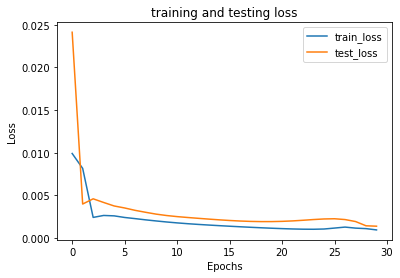

In [36]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='test_loss')
plt.title("training and testing loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [37]:
lstm_predict = lstm_model.predict(x_test)                      #predicting X_test values
lstm_predict.shape

(489, 1)

In [38]:
scaler.inverse_transform(lstm_predict)


ValueError: non-broadcastable output operand with shape (489,1) doesn't match the broadcast shape (489,4)

In [39]:
actual_lstm = np.repeat(lstm_predict,4, axis=-1)
actual_lstm

array([[0.00937773, 0.00937773, 0.00937773, 0.00937773],
       [0.00899851, 0.00899851, 0.00899851, 0.00899851],
       [0.00988846, 0.00988846, 0.00988846, 0.00988846],
       ...,
       [0.5549983 , 0.5549983 , 0.5549983 , 0.5549983 ],
       [0.5369669 , 0.5369669 , 0.5369669 , 0.5369669 ],
       [0.5322139 , 0.5322139 , 0.5322139 , 0.5322139 ]], dtype=float32)

In [40]:
predict_lstm=scaler.inverse_transform(np.reshape(actual_lstm,(len(lstm_predict),4)))[:,3]
predict_lstm

array([ 7636.79  ,  7620.6445,  7658.535 ,  7723.243 ,  7805.3296,
        7871.4844,  7939.0127,  8024.729 ,  8115.6875,  8194.396 ,
        8252.779 ,  8308.321 ,  8339.558 ,  8311.437 ,  8258.029 ,
        8181.5693,  8139.7383,  8145.4863,  8176.5938,  8210.881 ,
        8232.22  ,  8244.508 ,  8247.669 ,  8228.783 ,  8188.019 ,
        8139.624 ,  8105.6357,  8096.185 ,  8092.405 ,  8092.442 ,
        8110.1875,  8158.4487,  8240.756 ,  8343.496 ,  8451.627 ,
        8544.863 ,  8606.329 ,  8656.462 ,  8681.383 ,  8688.085 ,
        8695.852 ,  8726.222 ,  8795.514 ,  8955.627 ,  9186.728 ,
        9410.481 ,  9605.131 ,  9752.195 ,  9845.542 ,  9957.912 ,
       10043.674 , 10111.229 , 10173.514 , 10264.438 , 10353.079 ,
       10385.461 , 10397.049 , 10443.878 , 10649.025 , 10962.911 ,
       11159.305 , 11307.572 , 11416.272 , 11464.494 , 11521.73  ,
       11649.137 , 11821.412 , 11929.787 , 11968.882 , 12039.261 ,
       12246.313 , 12555.599 , 12843.783 , 13146.511 , 13443.4

In [41]:
original = np.repeat(y_test,4, axis=-1)

original.shape

original=scaler.inverse_transform(np.reshape(original,(len(y_test),4)))[:,3]

In [42]:
print("Pred Values-- " ,predict_lstm)
print("\nOriginal Values-- ",original)

Pred Values--  [ 7636.79    7620.6445  7658.535   7723.243   7805.3296  7871.4844
  7939.0127  8024.729   8115.6875  8194.396   8252.779   8308.321
  8339.558   8311.437   8258.029   8181.5693  8139.7383  8145.4863
  8176.5938  8210.881   8232.22    8244.508   8247.669   8228.783
  8188.019   8139.624   8105.6357  8096.185   8092.405   8092.442
  8110.1875  8158.4487  8240.756   8343.496   8451.627   8544.863
  8606.329   8656.462   8681.383   8688.085   8695.852   8726.222
  8795.514   8955.627   9186.728   9410.481   9605.131   9752.195
  9845.542   9957.912  10043.674  10111.229  10173.514  10264.438
 10353.079  10385.461  10397.049  10443.878  10649.025  10962.911
 11159.305  11307.572  11416.272  11464.494  11521.73   11649.137
 11821.412  11929.787  11968.882  12039.261  12246.313  12555.599
 12843.783  13146.511  13443.412  13580.977  13632.406  13708.514
 13786.508  13566.478  13234.614  13012.746  12971.186  13199.89
 13460.989  13666.553  13856.599  13920.795  13914.49   1392

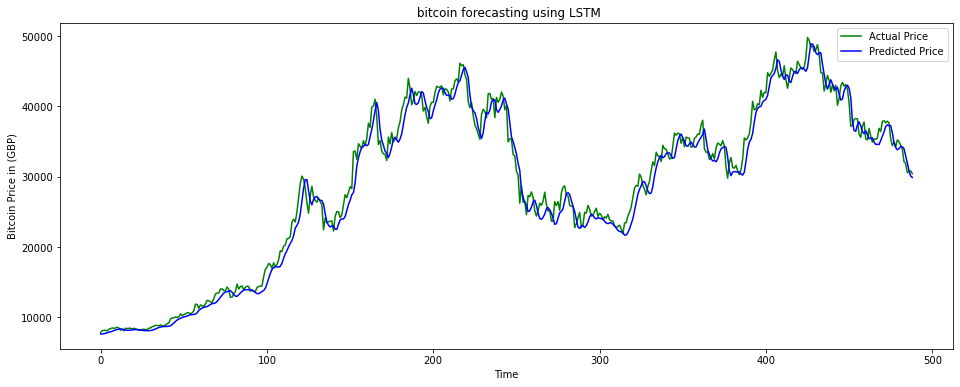

In [43]:
plt.figure(figsize=(16,6))
plt.plot(original, color = 'green', label = 'Actual Price')
plt.plot(predict_lstm, color = 'blue', label = 'Predicted Price')
plt.title(' bitcoin forecasting using LSTM')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price in (GBP)')
plt.legend(loc='best')
plt.show()

In [49]:
#GRU
#GATED RECURRENT UNIT
gru = keras.Sequential()

gru.add(layers.GRU(64, return_sequences=True, input_shape=(x_train.shape[1], 4)))

#gru.add(Dropout(0.2))
gru.add(layers.GRU(units=64, return_sequences=False))
gru.add(layers.Dense(1))

In [50]:
gru.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 60, 64)            13440     
                                                                 
 gru_3 (GRU)                 (None, 64)                24960     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 38,465
Trainable params: 38,465
Non-trainable params: 0
_________________________________________________________________


In [51]:
gru.compile(optimizer='adam', loss='mse', metrics = ["mae","mse","acc"])

In [52]:
hist=gru.fit(x_train, y_train, validation_data=(x_test,y_test),batch_size=32, epochs=30,shuffle=False)

Epoch 1/30
39/39 [==============================] - 5s 56ms/step - loss: 0.0128 - mae: 0.0837 - mse: 0.0128 - acc: 8.2102e-04 - val_loss: 0.0047 - val_mae: 0.0587 - val_mse: 0.0047 - val_acc: 0.0020
Epoch 2/30
39/39 [==============================] - 1s 35ms/step - loss: 0.0067 - mae: 0.0574 - mse: 0.0067 - acc: 8.2102e-04 - val_loss: 0.0029 - val_mae: 0.0424 - val_mse: 0.0029 - val_acc: 0.0020
Epoch 3/30
39/39 [==============================] - 1s 33ms/step - loss: 0.0013 - mae: 0.0237 - mse: 0.0013 - acc: 8.2102e-04 - val_loss: 0.0019 - val_mae: 0.0331 - val_mse: 0.0019 - val_acc: 0.0020
Epoch 4/30
39/39 [==============================] - 1s 32ms/step - loss: 0.0012 - mae: 0.0220 - mse: 0.0012 - acc: 8.2102e-04 - val_loss: 0.0018 - val_mae: 0.0324 - val_mse: 0.0018 - val_acc: 0.0020
Epoch 5/30
39/39 [==============================] - 1s 33ms/step - loss: 0.0011 - mae: 0.0209 - mse: 0.0011 - acc: 8.2102e-04 - val_loss: 0.0019 - val_mae: 0.0326 - val_mse: 0.0019 - val_acc: 0.0020
Epoch

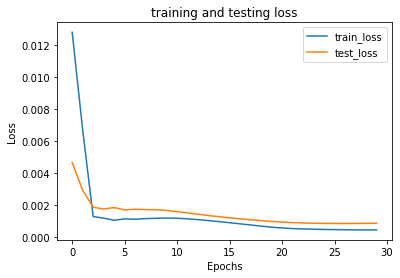

In [53]:
plt.plot(hist.history['loss'], label='train_loss')
plt.plot(hist.history['val_loss'], label='test_loss')
plt.title("training and testing loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [54]:
gru_predict= gru.predict(x_test)
gru_predict
print(gru_predict.shape)


(489, 1)


In [55]:
gru_predict= scaler.inverse_transform(gru_predict)


ValueError: non-broadcastable output operand with shape (489,1) doesn't match the broadcast shape (489,4)

In [56]:
prediction_gru = np.repeat(gru_predict,4, axis=-1)
prediction_gru.shape[1]

4

In [57]:
predict_gru=scaler.inverse_transform(np.reshape(prediction_gru,(len(gru_predict),4)))[:,3]
predict_gru

array([ 8195.933 ,  8237.643 ,  8358.026 ,  8434.743 ,  8515.746 ,
        8519.286 ,  8603.82  ,  8714.291 ,  8804.404 ,  8841.367 ,
        8859.872 ,  8924.97  ,  8902.505 ,  8754.911 ,  8692.168 ,
        8583.4795,  8663.49  ,  8740.033 ,  8796.53  ,  8817.47  ,
        8793.804 ,  8799.321 ,  8781.316 ,  8724.935 ,  8648.848 ,
        8598.32  ,  8612.582 ,  8653.494 ,  8646.434 ,  8649.39  ,
        8716.072 ,  8808.116 ,  8948.04  ,  9061.149 ,  9164.386 ,
        9205.773 ,  9199.397 ,  9251.373 ,  9225.831 ,  9211.874 ,
        9244.199 ,  9341.495 ,  9482.425 ,  9842.868 , 10136.764 ,
       10264.479 , 10380.62  , 10428.786 , 10447.714 , 10664.249 ,
       10675.929 , 10733.199 , 10797.649 , 10959.894 , 11023.403 ,
       10948.366 , 10964.4   , 11122.453 , 11699.022 , 12078.57  ,
       11921.437 , 12037.518 , 12081.395 , 12027.96  , 12182.2   ,
       12498.606 , 12692.115 , 12637.498 , 12564.854 , 12808.102 ,
       13309.013 , 13697.955 , 13840.641 , 14189.794 , 14413.5

In [58]:
original= np.repeat(y_test,4, axis=-1)

original



array([0.01507451, 0.01507451, 0.01507451, ..., 0.54512186, 0.54512186,
       0.54512186])

In [59]:
original=scaler.inverse_transform(np.reshape(original,(len(y_test),4)))[:,3]
original

array([ 7879.335938,  8091.228027,  8128.886719,  8161.130859,
        8062.915039,  8312.585938,  8382.482422,  8468.533203,
        8437.904297,  8473.341797,  8589.287109,  8457.646484,
        8161.378418,  8270.214844,  8059.035645,  8435.708984,
        8389.741211,  8435.253906,  8441.80957 ,  8319.000977,
        8429.702148,  8349.439453,  8241.077148,  8175.926758,
        8156.593262,  8252.228516,  8307.158203,  8230.842773,
        8260.06543 ,  8435.838867,  8481.570313,  8657.214844,
        8736.459961,  8844.728516,  8833.477539,  8783.74707 ,
        8909.470703,  8766.651367,  8794.509766,  8883.814453,
        9068.856445,  9197.611328,  9767.188477,  9914.27832 ,
        9914.352539, 10047.958984,  9983.3125  , 10046.040039,
       10478.137695, 10217.204102, 10391.864258, 10462.25    ,
       10645.804688, 10627.522461, 10486.453125, 10632.960938,
       10900.692383, 11857.214844, 11832.668945, 11273.994141,
       11744.765625, 11644.449219, 11530.870117, 11872.

In [60]:
print("Pred Values-- " ,predict_gru)
print("\nOriginal Values-- ",original)

Pred Values--  [ 8195.933   8237.643   8358.026   8434.743   8515.746   8519.286
  8603.82    8714.291   8804.404   8841.367   8859.872   8924.97
  8902.505   8754.911   8692.168   8583.4795  8663.49    8740.033
  8796.53    8817.47    8793.804   8799.321   8781.316   8724.935
  8648.848   8598.32    8612.582   8653.494   8646.434   8649.39
  8716.072   8808.116   8948.04    9061.149   9164.386   9205.773
  9199.397   9251.373   9225.831   9211.874   9244.199   9341.495
  9482.425   9842.868  10136.764  10264.479  10380.62   10428.786
 10447.714  10664.249  10675.929  10733.199  10797.649  10959.894
 11023.403  10948.366  10964.4    11122.453  11699.022  12078.57
 11921.437  12037.518  12081.395  12027.96   12182.2    12498.606
 12692.115  12637.498  12564.854  12808.102  13309.013  13697.955
 13840.641  14189.794  14413.517  14261.034  14231.768  14491.429
 14529.008  13761.063  13396.85   13536.2    13824.458  14544.14
 14576.569  14646.495  14787.54   14596.079  14597.982  14713.334

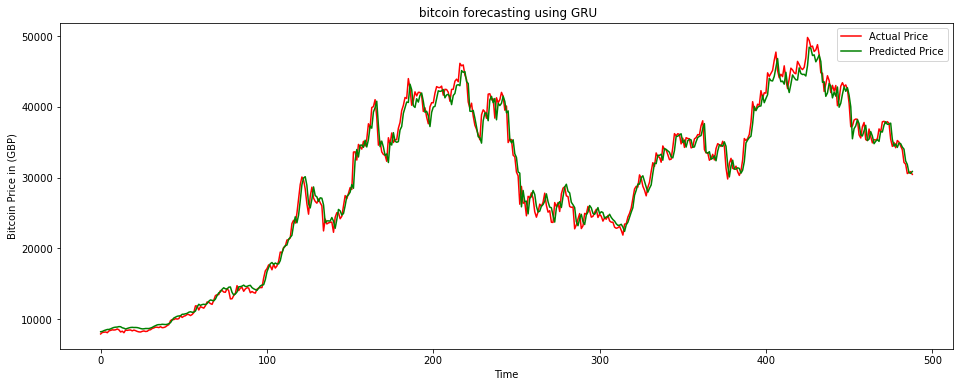

In [61]:
plt.figure(figsize=(16,6))
plt.plot(original, color = 'red', label = 'Actual Price')
plt.plot(predict_gru, color = 'green', label = 'Predicted Price')
plt.title(' bitcoin forecasting using GRU')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price in (GBP)')
plt.legend(loc='best')
plt.show()

In [67]:
model = keras.Sequential()
model.add(Bidirectional(LSTM(100, return_sequences=True), input_shape=(x_train.shape[1],4)))
model.add(Bidirectional(LSTM(100,return_sequences=False)))
model.add(Dense(1))
 



In [68]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirectio  (None, 60, 200)          84000     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 200)              240800    
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 1)                 201       
                                                                 
Total params: 325,001
Trainable params: 325,001
Non-trainable params: 0
_________________________________________________________________


In [69]:
model.compile(loss='mse', optimizer='adam',metrics = ["mae","mse","acc"])

In [70]:
loss=model.fit(x_train, y_train,validation_data=(x_test,y_test), batch_size=32, epochs=30,shuffle=False)

Epoch 1/30
39/39 [==============================] - 13s 151ms/step - loss: 0.0280 - mae: 0.1221 - mse: 0.0280 - acc: 8.2102e-04 - val_loss: 0.0370 - val_mae: 0.1579 - val_mse: 0.0370 - val_acc: 0.0020
Epoch 2/30
39/39 [==============================] - 5s 121ms/step - loss: 0.0103 - mae: 0.0728 - mse: 0.0103 - acc: 0.0000e+00 - val_loss: 0.0046 - val_mae: 0.0563 - val_mse: 0.0046 - val_acc: 0.0020
Epoch 3/30
39/39 [==============================] - 5s 122ms/step - loss: 0.0030 - mae: 0.0368 - mse: 0.0030 - acc: 8.2102e-04 - val_loss: 0.0033 - val_mae: 0.0431 - val_mse: 0.0033 - val_acc: 0.0020
Epoch 4/30
39/39 [==============================] - 5s 124ms/step - loss: 0.0020 - mae: 0.0291 - mse: 0.0020 - acc: 8.2102e-04 - val_loss: 0.0030 - val_mae: 0.0424 - val_mse: 0.0030 - val_acc: 0.0020
Epoch 5/30
39/39 [==============================] - 5s 125ms/step - loss: 0.0020 - mae: 0.0301 - mse: 0.0020 - acc: 8.2102e-04 - val_loss: 0.0027 - val_mae: 0.0399 - val_mse: 0.0027 - val_acc: 0.0020

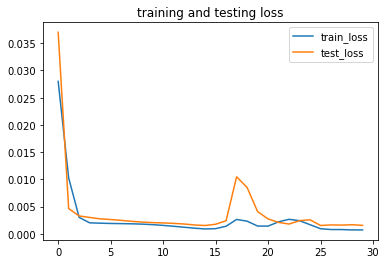

In [71]:
plt.plot(loss.history['loss'], label='train_loss')
plt.plot(loss.history['val_loss'], label='test_loss')
plt.title("training and testing loss")
plt.legend()
plt.show()

In [72]:
bilstm_predict = model.predict(x_test)                      #predicting X_test values
bilstm_predict

array([[0.01928121],
       [0.01948149],
       [0.02128075],
       [0.02317463],
       [0.02533564],
       [0.02644922],
       [0.02811728],
       [0.03036309],
       [0.03245366],
       [0.03380114],
       [0.03451046],
       [0.03558695],
       [0.0356051 ],
       [0.03351884],
       [0.03135983],
       [0.02859537],
       [0.0280448 ],
       [0.02885836],
       [0.02984182],
       [0.03055392],
       [0.0306156 ],
       [0.03060991],
       [0.03050229],
       [0.02993067],
       [0.02836796],
       [0.02679884],
       [0.02619667],
       [0.02642562],
       [0.02641079],
       [0.02640539],
       [0.02736377],
       [0.02916671],
       [0.03191886],
       [0.0345843 ],
       [0.03730489],
       [0.03921242],
       [0.04006398],
       [0.04120015],
       [0.04154605],
       [0.04154027],
       [0.04189027],
       [0.04334804],
       [0.04598686],
       [0.05222544],
       [0.05904705],
       [0.06406537],
       [0.06829268],
       [0.071

In [73]:
bilstm_predict= scaler.inverse_transform(bilstm_predict)

ValueError: non-broadcastable output operand with shape (489,1) doesn't match the broadcast shape (489,4)

In [74]:
prediction = np.repeat(bilstm_predict,4, axis=-1)
prediction

array([[0.01928121, 0.01928121, 0.01928121, 0.01928121],
       [0.01948149, 0.01948149, 0.01948149, 0.01948149],
       [0.02128075, 0.02128075, 0.02128075, 0.02128075],
       ...,
       [0.5483433 , 0.5483433 , 0.5483433 , 0.5483433 ],
       [0.531141  , 0.531141  , 0.531141  , 0.531141  ],
       [0.52559894, 0.52559894, 0.52559894, 0.52559894]], dtype=float32)

In [75]:
predict_bilstm=scaler.inverse_transform(np.reshape(prediction,(len(bilstm_predict),4)))[:,3]
predict_bilstm

array([ 8058.4404,  8066.9673,  8143.5723,  8224.206 ,  8316.213 ,
        8363.624 ,  8434.644 ,  8530.262 ,  8619.27  ,  8676.639 ,
        8706.839 ,  8752.672 ,  8753.444 ,  8664.62  ,  8572.698 ,
        8454.999 ,  8431.558 ,  8466.196 ,  8508.067 ,  8538.387 ,
        8541.013 ,  8540.77  ,  8536.1875,  8511.851 ,  8445.316 ,
        8378.51  ,  8352.872 ,  8362.62  ,  8361.988 ,  8361.759 ,
        8402.5625,  8479.324 ,  8596.5   ,  8709.982 ,  8825.814 ,
        8907.029 ,  8943.285 ,  8991.658 ,  9006.387 ,  9006.14  ,
        9021.042 ,  9083.107 ,  9195.457 ,  9461.07  ,  9751.507 ,
        9965.166 , 10145.147 , 10265.501 , 10332.749 , 10485.985 ,
       10570.794 , 10640.175 , 10711.294 , 10845.242 , 10947.493 ,
       10962.486 , 10971.241 , 11060.5625, 11413.907 , 11796.672 ,
       11915.006 , 12031.352 , 12115.998 , 12112.588 , 12186.88  ,
       12381.091 , 12585.66  , 12660.019 , 12663.23  , 12789.892 ,
       13117.628 , 13504.92  , 13781.075 , 14107.6875, 14396.5

In [76]:
original= np.repeat(y_test,4, axis=-1)

original



array([0.01507451, 0.01507451, 0.01507451, ..., 0.54512186, 0.54512186,
       0.54512186])

In [77]:
original=scaler.inverse_transform(np.reshape(original,(len(y_test),4)))[:,3]

In [78]:
print("Pred Values-- " ,predict_bilstm)
print("\nOriginal Values-- ",original)

Pred Values--  [ 8058.4404  8066.9673  8143.5723  8224.206   8316.213   8363.624
  8434.644   8530.262   8619.27    8676.639   8706.839   8752.672
  8753.444   8664.62    8572.698   8454.999   8431.558   8466.196
  8508.067   8538.387   8541.013   8540.77    8536.1875  8511.851
  8445.316   8378.51    8352.872   8362.62    8361.988   8361.759
  8402.5625  8479.324   8596.5     8709.982   8825.814   8907.029
  8943.285   8991.658   9006.387   9006.14    9021.042   9083.107
  9195.457   9461.07    9751.507   9965.166  10145.147  10265.501
 10332.749  10485.985  10570.794  10640.175  10711.294  10845.242
 10947.493  10962.486  10971.241  11060.5625 11413.907  11796.672
 11915.006  12031.352  12115.998  12112.588  12186.88   12381.091
 12585.66   12660.019  12663.23   12789.892  13117.628  13504.92
 13781.075  14107.6875 14396.523  14463.959  14481.943  14608.762
 14700.847  14370.329  13977.318  13821.785  13874.517  14273.6455
 14547.43   14711.929  14880.314  14880.572  14849.147  14882

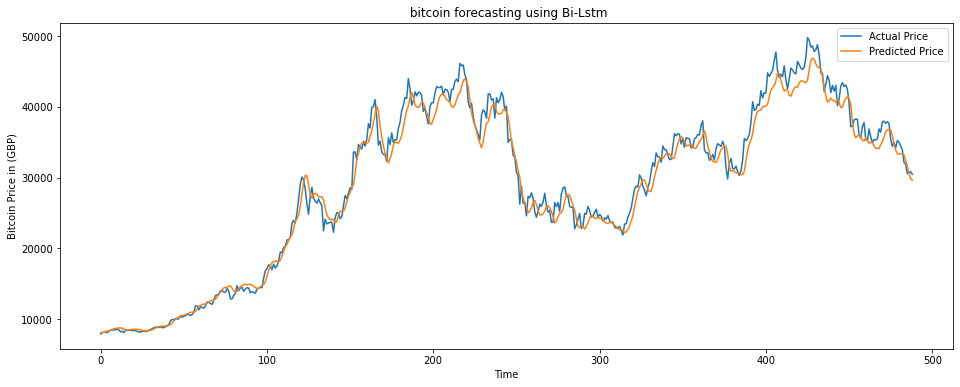

In [79]:
plt.figure(figsize=(16,6))
plt.plot(original, label = 'Actual Price')
plt.plot(predict_bilstm, label = 'Predicted Price')
plt.title(' bitcoin forecasting using Bi-Lstm')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price in (GBP)')
plt.legend(loc='best')
plt.show()

In [80]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score

In [81]:
#calculating Error metrics
def error_metrics(y_true, y_pred):
    return (
        f"MAE: {round(mean_absolute_error(y_true, y_pred), 3)}",
        f"MSE: {round(mean_squared_error(y_true, y_pred), 3)}",
        f"RMSE: {round(sqrt(mean_squared_error(y_true, y_pred)), 3)}",
        f"R2: {round(r2_score(y_true, y_pred), 3)}",
        f"Mape: {round( np.mean(np.abs((y_true - y_pred)/y_true)*100), 3)}"
    )

In [82]:
lstm_metrics=error_metrics(original,predict_lstm)
gru_metrics=error_metrics(original,predict_gru)
bilstm_metrics=error_metrics(original,predict_bilstm)

In [83]:
print("LSTM METRICS:",lstm_metrics)
print("GRU METRICS:",gru_metrics)
print("BI-LSTM METRICS:",bilstm_metrics)

LSTM METRICS: ('MAE: 1208.857', 'MSE: 2490681.103', 'RMSE: 1578.189', 'R2: 0.981', 'Mape: 4.299')
GRU METRICS: ('MAE: 927.629', 'MSE: 1587483.664', 'RMSE: 1259.954', 'R2: 0.988', 'Mape: 3.288')
BI-LSTM METRICS: ('MAE: 1252.608', 'MSE: 2822221.856', 'RMSE: 1679.947', 'R2: 0.979', 'Mape: 4.025')


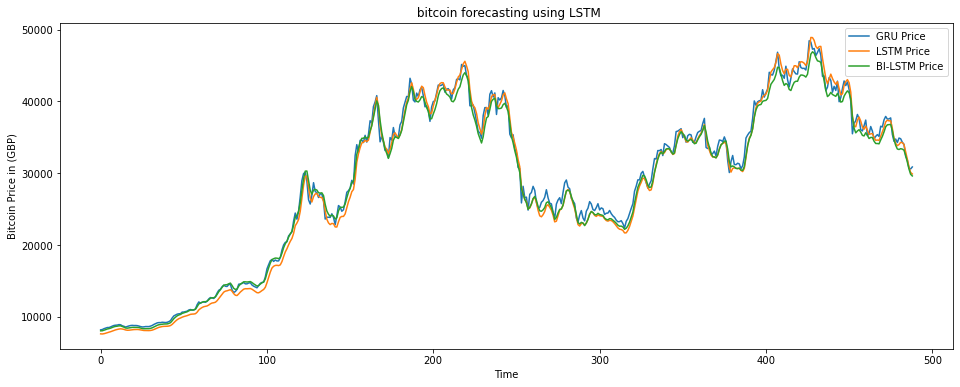

In [84]:
plt.figure(figsize=(16,6))

plt.plot(predict_gru,  label = 'GRU Price')
plt.plot(predict_lstm,  label = 'LSTM Price')
plt.plot(predict_bilstm,  label = 'BI-LSTM Price')
plt.title(' bitcoin forecasting using LSTM')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price in (GBP)')
plt.legend(loc='best')
plt.show()

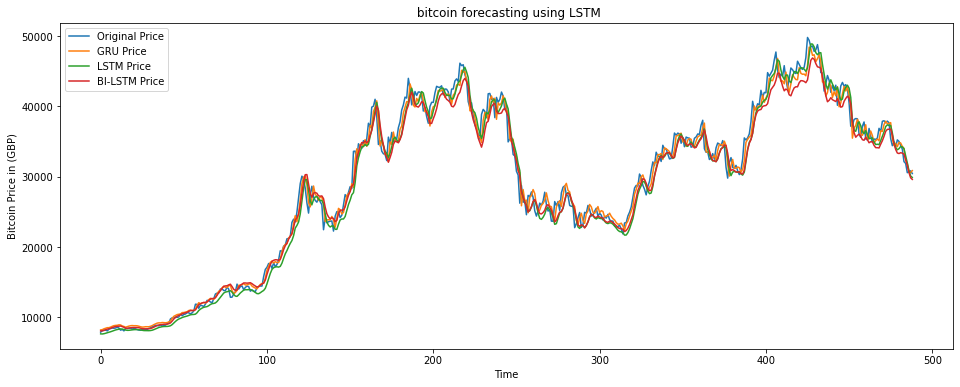

In [85]:
plt.figure(figsize=(16,6))
plt.plot(original,  label = 'Original Price')
plt.plot(predict_gru,  label = 'GRU Price')
plt.plot(predict_lstm,  label = 'LSTM Price')
plt.plot(predict_bilstm,  label = 'BI-LSTM Price')
plt.title(' bitcoin forecasting using LSTM')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price in (GBP)')
plt.legend(loc='best')
plt.show()